# Quick survey of some other important concepts in geo-data-science

The field of data science for Earth sciences is vast, and the available software tools are always growing and changing. If you end up using these tools in your work, you can (and should) expect to keep learning and refining your skills and toolbox. This also means that no single course can cover everything (specially not a 6 week course). 

In this notebook we will get a high level overview of a few more concepts (software packages), which may be helpful as starting points for further exploration.

## Maps

This is a derivative of the longer notebook available [here](https://earth-env-data-science.github.io/lectures/mapping_cartopy.html). 

Making maps is a fundamental part of geoscience research. Maps differ from regular figures in the following principle ways:

- Maps require a projection of geographic coordinates on the 3D Earth to the 2D space of your figure.

- Maps often include extra decorations besides just our data (e.g. continents, country borders, etc.)

Mapping is a notoriously hard and complicated problem, mostly due to the complexities of projection.

In this lecture, we will learn about Cartopy, one of the most common packages for making maps within python.

### Projections: Most of our media for visualization *are* flat

Our two most common media are flat:

 * Paper
 * Screen

![](https://raw.githubusercontent.com/SciTools/cartopy-tutorial/master/static/flat_medium.jpg)

#### [Map] Projections: Taking us from spherical to flat

A map projection (or more commonly refered to as just "projection") is:

> a systematic transformation of the latitudes and longitudes of locations from the surface of a sphere or an ellipsoid into locations on a plane. [[Wikipedia: Map projection](https://en.wikipedia.org/wiki/Map_projection)].

#### The major problem with map projections

![orange peel](https://raw.githubusercontent.com/SciTools/cartopy-tutorial/master/static/orange_peel.jpg)

 * The surface of a sphere is topologically different to a 2D surface, therefore we *have* to cut the sphere *somewhere*
 * A sphere's surface cannot be represented on a plane without distortion.
 
There are many different ways to make a projection, and we will not attempt to explain all of the choices and tradeoffs here. Instead, you can read Phil's [original tutorial](https://github.com/SciTools/cartopy-tutorial/blob/master/tutorial/projections_crs_and_terms.ipynb) for a great overview of this topic.
Instead, we will dive into the more practical sides of Caropy usage.


### Introducing Cartopy

https://scitools.org.uk/cartopy/docs/latest/

Cartopy makes use of the powerful [PROJ.4](https://proj4.org/), numpy and shapely libraries and includes a programatic interface built on top of Matplotlib for the creation of publication quality maps.

Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.

In [1]:
import cartopy.crs as ccrs
import cartopy

In [2]:
ccrs.PlateCarree()

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

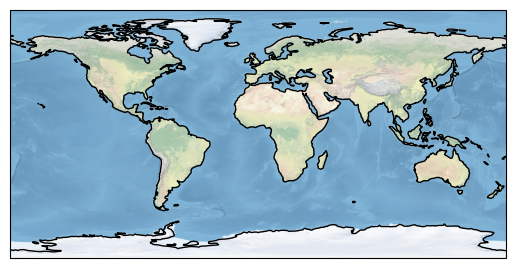

In [7]:
# Can use with matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

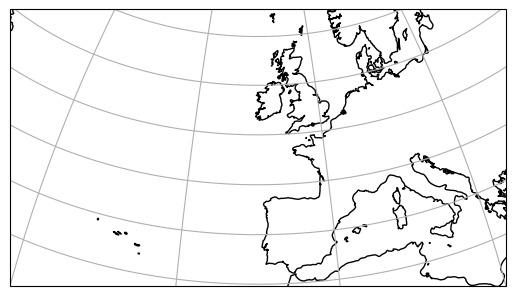

In [9]:
# Can make regional maps 
central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')

/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


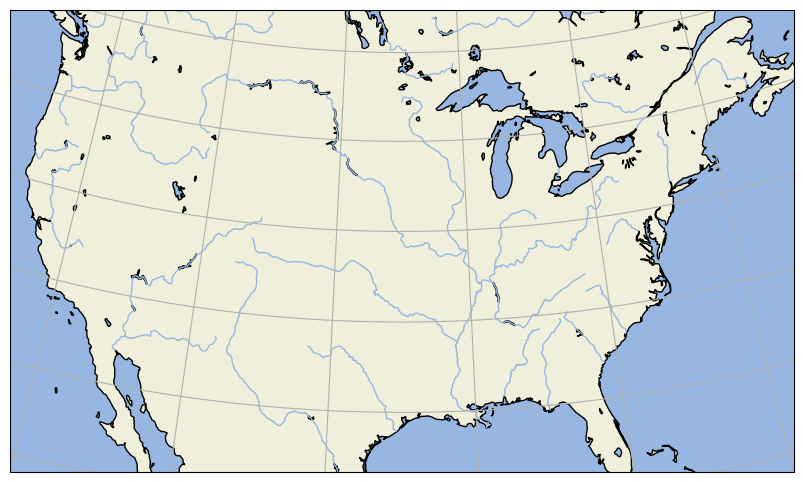

In [10]:
# Can add some default features 
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

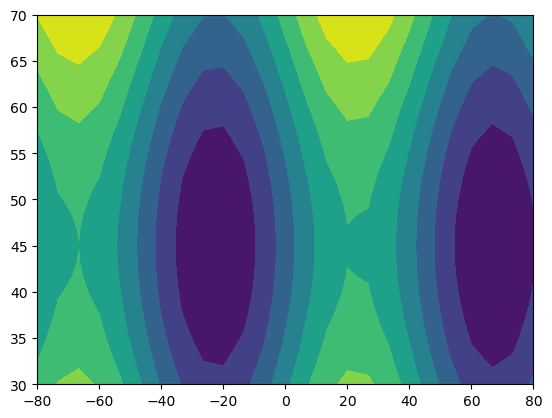

In [11]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

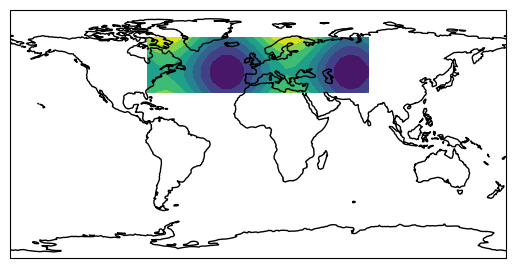

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

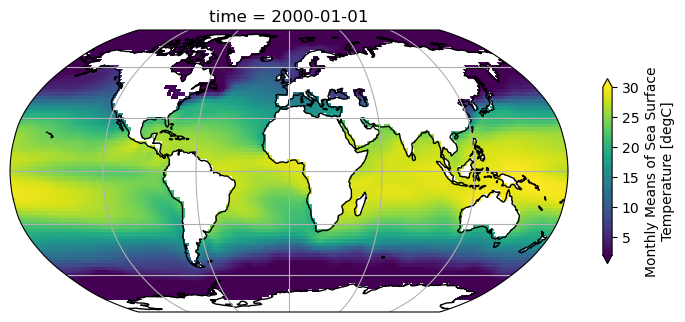

In [13]:
# Integration with xarray

import xarray as xr
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
sst = ds.sst.sel(time='2000-01-01', method='nearest')
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

## Earth Science Model (ESM) Output

ESMs are computer models, which approximately model the earth system. These types of models are used in a variety of contexts in the Earth Science: From idealized experiments to understand meachanisms in the climate systems, to reanalyses and state estimates to synthesize past and current observations, to fully coupled representations of the earth system enabling forecasts of climate conditions under future scenarios.

### What is a General Circulation Model?

A GCM is a computer model that simulates the circulation of a fluid (e.g., the ocean or atmosphere), and is thus one (but important) component of an ESM. It is based on a set of partial differential equations, which describe the motion of a fluid in 3D space, and integrates these forward in time.  Most fundamentally, these models use a discrete representation of the [Navier-Stokes Equations](https://en.wikipedia.org/wiki/Navier%E2%80%93Stokes_equations) but can include more equations to represent e.g., the thermodynamics, chemistry or biology of the coupled earth system.
Depending on the goal these equations are forced with predetermined boundary conditions (e.g. an ocean only simulation is forced by observed atmospheric conditions) or the components of the earth system are coupled together and allowed to influence each other. A 'climate model' is often the latter case which is forced by e.g. different scenarios of greenhouse gas emissions. This enables predictions of how the coupled system will evolve in the future.

### The globe divided into boxes
Since there is no analytical solution to the full Navier-Stokes equation, modern GCMs solve them using numerical methods. They use a discretized version of the equations, which approximates them within a finite volume, or grid-cell. Each GCM splits the ocean or atmosphere into many cells, both in the horizontal and vertical.

![gcm-schematic](https://www.ipcc-data.org/img/3d_gcm_structure.jpg)
> Source: www.ipcc-data.org

It is numerically favorable to shift (or 'stagger') the grid points where the model calculates the velocity with regard to the grid point where tracer values (temperature, salinity, or others) are calculated. There are several different ways to shift these points, commonly referred to as [Arakawa grids](https://en.wikipedia.org/wiki/Arakawa_grids). 

![c-grid](https://xgcm.readthedocs.io/en/latest/_images/grid2d_hv.svg)
> Source: xgcm.readthedocs.io

Most GCMs use a [curvilinear grid](https://en.wikipedia.org/wiki/Curvilinear_coordinates) to avoid infinitely small grid cells at the North Pole. Some examples of curvilinear grids are a tripolar grid (the Arctic region is defined by two poles, placed over landmasses)

<img src="https://www.geomar.de/fileadmin/_migrated/pics/globe_grid2_10.png" width="500"/>

> Source: [GEOMAR](https://www.geomar.de)

or a cubed-sphere grid or a lat-lon cap (different versions of connected patches of curvilinear grids).

<img src="https://xgcm.readthedocs.io/en/latest/_images/cubed_sphere.jpeg" width="600"/>

> Credit: [Gael Forget](http://www.gaelforget.net). More information about the simulation and grid available at [https://doi.org/10.5194/gmd-8-3071-2015](https://doi.org/10.5194/gmd-8-3071-2015).

In most ocean models, due to these 'warped' coordinate systems, the boxes described are not perfectly rectangular [cuboids](https://en.wikipedia.org/wiki/Cuboid). To accurately represent the volume of the cell, we require so-called grid metrics - the distances, cell areas, and volume to calculate operators like e.g., divergence.

If you want to compare models with different grids it can sometimes be necessary to regrid your output. However, some calculations should be performed on the native model grid for maximum accuracy. We will discuss these different cases below. 

### Grid resolution
Discretizing the equations has consequences: 

- In order to get a realistic representation of the global circulation, the size of grid cells needs to be chosen so that all relevant processes are resolved.  In reality, this usually requires too much computing power for global models and so processes that are too small to be explicitly resolved, like [mesoscale eddies](https://www.gfdl.noaa.gov/ocean-mesoscale-eddies/) or [vertical mixing](https://www.gfdl.noaa.gov/ocean-mixing/), need to be carefully parameterized since they influence the large scale circulation. The following video illustrates the representation of mesoscale eddies in global models of different grid resolution. It shows the surface nutrient fields of three coupled climate models (produced by NOAA/GFDL) around the Antarctic Peninsula with increasing ocean resolution from left to right.

<div style="text-align: center"><iframe width="640", height="360" src="https://player.vimeo.com/video/259423826" frameborder="4"></iframe></div>

> Nominal model resolution from left to right: 1 degree (CM2.1deg), 0.25 degree (CM2.5) and 0.1 degree (CM2.6). The left ocean model employs a parametrization for both the advective and diffusive effects of mesoscale eddies, while the middle and right model do not.

### CMIP - Climate Model Intercomparison Project

Climate modeling has been a cornerstone of understanding our climate and the [consequences of continued emissions of greenhouse gases](https://www.gfdl.noaa.gov/awards/former-noaa-scientist-suki-manabe-shares-nobel-prize-in-physics-for-pioneering-climate-prediction/) for decades. Much of the recent efforts in the community have been focus on model intercomparison projects (MIPs), which invite submissions of many different modeling groups around the world to run their models (which are all set up slightly different) under centralized forcing scenarios. These results can then be analyzed and the spread between different models can give an idea about the certainty of these predictions. The recent [Coupled Model Intercomparison Project Phase 6](https://gmd.copernicus.org/articles/9/1937/2016/) (CMIP6) represents an international effort to represent the state-of-the-art knowledge about how the climate system might evolve in the future and informs much of the [Intergovernmental Panel on Climate Change Report]([Intergovernmental Panel on Climate Change Report](https://github.com/IPCC-WG1/Chapter-9).

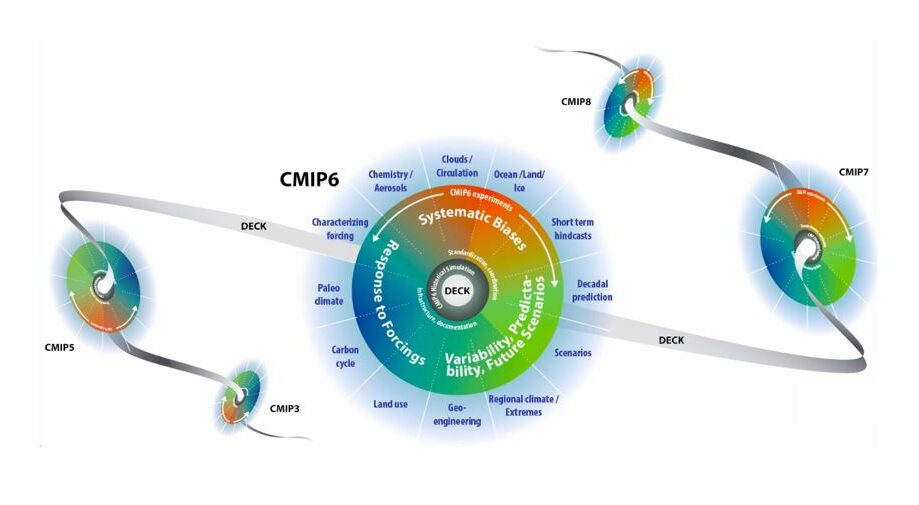

In this lecture we will learn how to quickly search and analyze CMIP6 data with Pangeo tools in the cloud, a process that using the 'download and analyze' workflow often becomes prohibitively slow and inefficient due to the sheer scale of the data.

The basis for this workflow are the analysis-ready-cloud-optimized repositories of CMIP6 data, which are currently maintained by the pangeo community and publicly available on both [Google Cloud Storage](https://medium.com/pangeo/cmip6-in-the-cloud-five-ways-96b177abe396) and [Amazon S3](https://www.youtube.com/watch?v=C0UhiiGgbWA&t=3267s) as a collection of [zarr](https://zarr.readthedocs.io/en/stable/) stores.

The cloud native approach enables scientific results to be fully reproducible, encouraging to build onto and collaborate on scientific results.  

Here we use a Python library called [xmip](https://cmip6-preprocessing.readthedocs.io/en/latest/?badge=latest). 

In [14]:
from xmip.preprocessing import combined_preprocessing
from xmip.utils import google_cmip_col
from xmip.postprocessing import match_metrics
import matplotlib.pyplot as plt

The first thing we have to do is to get an overview of all the data available. In this case we are using [intake-esm](https://intake-esm.readthedocs.io/en/stable/index.html) to load a collection of zarr stores on Google Cloud Storage, but there are [other options](https://pangeo-data.github.io/pangeo-cmip6-cloud/accessing_data.html) to access the data too.

Lets create a collection object and look at it


In [15]:
col = google_cmip_col()
col

Future exception was never retrieved
future: <Future finished exception=ClientConnectionError('Connection lost: [SSL: APPLICATION_DATA_AFTER_CLOSE_NOTIFY] application data after close notify (_ssl.c:2706)')>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.12/asyncio/sslproto.py", line 651, in _do_shutdown
    self._sslobj.unwrap()
  File "/srv/conda/envs/notebook/lib/python3.12/ssl.py", line 920, in unwrap
    return self._sslobj.shutdown()
           ^^^^^^^^^^^^^^^^^^^^^^^
ssl.SSLError: [SSL: APPLICATION_DATA_AFTER_CLOSE_NOTIFY] application data after close notify (_ssl.c:2706)

The above exception was the direct cause of the following exception:

aiohttp.client_exceptions.ClientConnectionError: Connection lost: [SSL: APPLICATION_DATA_AFTER_CLOSE_NOTIFY] application data after close notify (_ssl.c:2706)


,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


This object describes all the available data (over 500k single zarr stores!). The rows describe different 'facets' that can be used to search and query subsets of the data. For detailed info on each of the facets please refer to this [document](https://docs.google.com/document/d/1h0r8RZr_f3-8egBMMh7aqLwy3snpD6_MrDz1q8n5XUk/edit).

So obviously we never want to work with *all* the data. Lets check out how to get a subset. 

First we need to understand a bit better what all these facets mean and how to see which ones are in the full collection. Lets start with the `experiment_id`: This is the prescribed forcing for a particular MIP that is exactly the same across all different models. We can look at the values of the collection as a pandas dataframe to convieniently list all values.

In [16]:
col.df['experiment_id'].unique()

array(['highresSST-present', 'piControl', 'control-1950', 'hist-1950',
       'historical', 'amip', 'abrupt-4xCO2', 'abrupt-2xCO2',
       'abrupt-0p5xCO2', '1pctCO2', 'ssp585', 'esm-piControl', 'esm-hist',
       'hist-piAer', 'histSST-1950HC', 'ssp245', 'hist-1950HC', 'histSST',
       'piClim-2xVOC', 'piClim-2xNOx', 'piClim-2xdust', 'piClim-2xss',
       'piClim-histall', 'hist-piNTCF', 'histSST-piNTCF',
       'aqua-control-lwoff', 'piClim-lu', 'histSST-piO3', 'piClim-CH4',
       'piClim-NTCF', 'piClim-NOx', 'piClim-O3', 'piClim-HC',
       'faf-heat-NA0pct', 'ssp370SST-lowCH4', 'piClim-VOC',
       'ssp370-lowNTCF', 'piClim-control', 'piClim-aer', 'hist-aer',
       'faf-heat', 'faf-heat-NA50pct', 'ssp370SST-lowNTCF',
       'ssp370SST-ssp126Lu', 'ssp370SST', 'ssp370pdSST', 'histSST-piAer',
       'piClim-ghg', 'piClim-anthro', 'faf-all', 'hist-nat', 'hist-GHG',
       'ssp119', 'piClim-histnat', 'piClim-4xCO2', 'ssp370',
       'piClim-histghg', 'highresSST-future', 'esm-ssp585-

The experiments you are probably most interested in are the following:
- `piControl`: In most cases this is the 'spin up' phase of the model, where it is run with a constant forcing (representing pre-industrial greenhouse gas concentrations)
- `historical`: This experiment is run with the observed forcing in the past. 
- `ssp***`: A set of ["Shared Socioeconomic Pathways"](https://www.sciencedirect.com/science/article/pii/S0959378016300681) which represent different combined scenarios of future greenhouse gas emissions and other socio-economic indicators ([Explainer](https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change/)). These are a fairly complex topic, but to simplify this for our purposes here we can treat `ssp585` as the 'worst-case' and `ssp245` as 'middle-of-the-road'.

You can explore the available models (`source_id`) in the same way as above:

In [17]:
col.df['source_id'].unique()

array(['CMCC-CM2-HR4', 'EC-Earth3P-HR', 'HadGEM3-GC31-MM',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LM', 'EC-Earth3P', 'ECMWF-IFS-HR',
       'ECMWF-IFS-LR', 'HadGEM3-GC31-LL', 'CMCC-CM2-VHR4', 'GFDL-CM4',
       'GFDL-AM4', 'IPSL-CM6A-LR', 'E3SM-1-0', 'CNRM-CM6-1', 'GFDL-ESM4',
       'GFDL-ESM2M', 'GFDL-CM4C192', 'GFDL-OM4p5B', 'GISS-E2-1-G',
       'GISS-E2-1-H', 'CNRM-ESM2-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'MIROC6',
       'AWI-CM-1-1-MR', 'EC-Earth3-LR', 'IPSL-CM6A-ATM-HR', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'SAM0-UNICON',
       'GISS-E2-1-G-CC', 'UKESM1-0-LL', 'EC-Earth3', 'EC-Earth3-Veg',
       'FGOALS-f3-L', 'CanESM5', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'NESM3', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MRI-AGCM3-2-H', 'MRI-AGCM3-2-S',
       'MCM-UA-1-0', 'INM-CM5-H', 'KACE-1-0-G', 'NorESM2-LM',
       'FGOALS-f3-H', 'FGOALS-g3', 'MIROC-ES2L', 'FIO-ESM-2-0', 'NorCPM1',
       'NorESM1-F', 'MPI-ESM1-2-XR'

Now you want to decide what variable (`variable_id`) you want to look at and in conjunction what time frequency of output (`table_id`) is available. This handy [spreadsheet](https://docs.google.com/spreadsheets/d/1UUtoz6Ofyjlpx5LdqhKcwHFz2SGoTQV2_yekHyMfL9Y/edit#gid=1221485271) can help you find the value for `variable_id` and the available time frequencies (`table_id`).  

Lets look at an example for monthly (`'table_id'='Omon'`) sea surface temperature (`'variable_id'='tos'`) for the `historical` experiment: 

In [18]:
cat = col.search(
    variable_id='tos', # ocean surface temperature
    table_id='Omon',
    experiment_id='historical',
    source_id=['GFDL-ESM4'],
)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,3
table_id,1
variable_id,1
grid_label,2
zstore,6
dcpp_init_year,0


The last facet we need to discuss is `member_id` and `grid_label`: 
You can see here that we have 3 `member_id` values for the given query. 

In [19]:
cat.df['member_id'].unique()

array(['r3i1p1f1', 'r2i1p1f1', 'r1i1p1f1'], dtype=object)

This indicates that for this particular model/experiment 3 ensemble members were run with varing realizations/initial_condiditions/physics/forcing or a combination thereof. The naming is explained in [this](https://docs.google.com/document/d/1h0r8RZr_f3-8egBMMh7aqLwy3snpD6_MrDz1q8n5XUk/edit) document:
> Example of a variant_label:  if realization_index=2, initialization_index=1, physics_index=3, and forcing_index=233, then variant_label = “r2i1p3f233”.

There can be many more members for some particular models, which provides an opportunity to investigate internal variability of the climate system as compared to forced signals.

Finally there are two values of `grid_label`

In [20]:
cat.df['grid_label'].unique()

array(['gr', 'gn'], dtype=object)

The value `gn` always stands for the native model grid (which can be quite complex but preserves the most detail) and `gr` indicates data that has been regridded on regular lon/lat intervals.

Now that you know how to query and subset the collection, it is time to actually load in some model data as xarray datasets!

In [21]:
# create a smaller catalog from the full collection using faceted search
cat = col.search(
    variable_id='tos', # Ocean surface temperature
    experiment_id='historical', # only runs for the historical forcing period
    table_id='Omon', # monthly oceanic data
    grid_label='gn', #native model grid only
    source_id=['IPSL-CM6A-LR', 'MRI-ESM2-0', 'GFDL-ESM4'], # only choosing a few models here, there are many more!
    member_id=['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'], #lets restrict us here to only a few members, you can modify this later to experiment.
)

# read all datasets into a dictionary but apply the xmip preprocessing before
ddict = cat.to_dataset_dict(
    preprocess=combined_preprocessing,
    xarray_open_kwargs={'use_cftime':True},
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/srv/conda/envs/notebook/lib/python3.12/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MRI.MRI-ESM2-0.historical.r3i1p1f1.Omon.gn.none.tos:While renaming to target `lon_bounds`, more than one candidate was found ['x_bnds', 'vertices_longitude']. Renaming x_bnds to lon_bounds. Please double check results.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.12/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MRI.MRI-ESM2-0.historical.r3i1p1f1.Omon.gn.none.tos:While renaming to target `lat_bounds`, more than one candidate was found ['y_bnds', 'vertices_latitude']. Renaming y_bnds to lat_bounds. Please double check results.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.12/site-packages/xmip/preprocessing.py:96: UserWarning: CMIP.MRI.MRI-ESM2-0.historical.r2i1p1f1.Omon.gn.none.tos:While renaming to target `lon_bounds`, more than one candidate was found ['x_bnds', 'vertices_longitude']. Renaming x_bnds to lon_bounds. Please double check results.
  warnings.warn(

Here we did two things: 
- We searched the full collection based on a combination of facets like the variable, the experiment and only a test set of models.
- We loaded the datasets into a dictionary of xarray datasets (note they are not loaded into memory, but instead these are lazyly loaded dask arrays -- more on this in the following lectures).

In [22]:
list(ddict.keys())

['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn',
 'CMIP.MRI.MRI-ESM2-0.historical.Omon.gn']

In [23]:
ddict['CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn']

<xarray.Dataset> Size: 3GB
Dimensions:         (member_id: 3, dcpp_init_year: 1, time: 1980, y: 332,
                     x: 362, vertex: 4, bnds: 2)
Coordinates: (12/13)
    area            (y, x) float32 481kB dask.array<chunksize=(332, 362), meta=np.ndarray>
    lat             (y, x) float32 481kB dask.array<chunksize=(332, 362), meta=np.ndarray>
    lon             (y, x) float32 481kB dask.array<chunksize=(332, 362), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
    lat_verticies   (y, x, vertex) float32 2MB dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    lon_verticies   (y, x, vertex) float32 2MB dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    ...              ...
  * y               (y) int64 3kB 0 1 2 3 4 5 6 ... 325 326 327 328 329 330 331
  * x               (x) int64 3kB 0 1 2 3 4 5 6 ... 355 356 357 358 359 360 361
    lon_bounds      (bnds, y, x) float32 961kB dask.array<chunksize=(1, 332, 362), meta=np.ndarray>
    lat_bounds      (bnds, y, x) float32 961kB dask.array<chunksize=(1, 332, 362), meta=np.ndarray>
  * member_id       (member_id) object 24B 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: vertex, bnds
Data variables:
    tos             (member_id, dcpp_init_year, time, y, x) float32 3GB dask.array<chunksize=(1, 1, 251, 332, 362), meta=np.ndarray>
Attributes: (12/51)
    CMIP6_CV_version:                 cv=6.2.3.5-2-g63b123e
    Conventions:                      CF-1.7 CMIP-6.2
    EXPID:                            historical
    NCO:                              "4.6.0"
    activity_id:                      CMIP
    branch_method:                    standard
    ...                               ...
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20180803
    intake_esm_attrs:_data_format_:   zarr
    variant_info:                     Restart from another point in piControl...
    intake_esm_dataset_key:           CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn

You can see that both datasets have the same names for many of the coordinates (e.g. 'x' and 'y' for the logical indices in zonal and meridional direction). This is actually not always the case for the raw CMIP6 data, which is why [xMIP](https://github.com/jbusecke/xMIP) was developed in an effort to crowdsource these common data-cleaning tasks. For this example we only use the `combined_preprocessing` function which fixes some of the naming, but check out the [docs](https://cmip6-preprocessing.readthedocs.io/en/latest/?badge=latest) to see more helpful code for CMIP analysis.

Ok but now lets analyze the data! Using what we know about xarray we can get a timeseries of the global sea surface temperature:

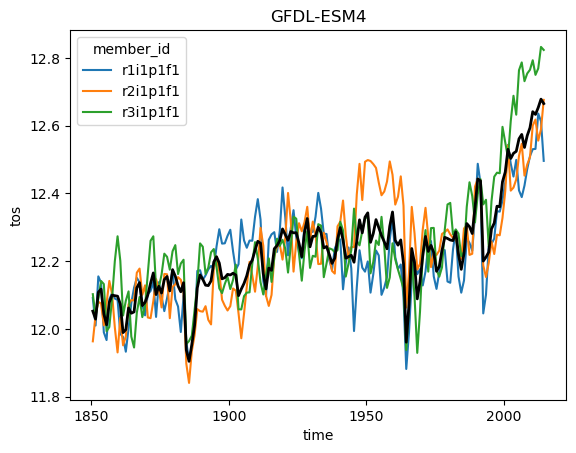

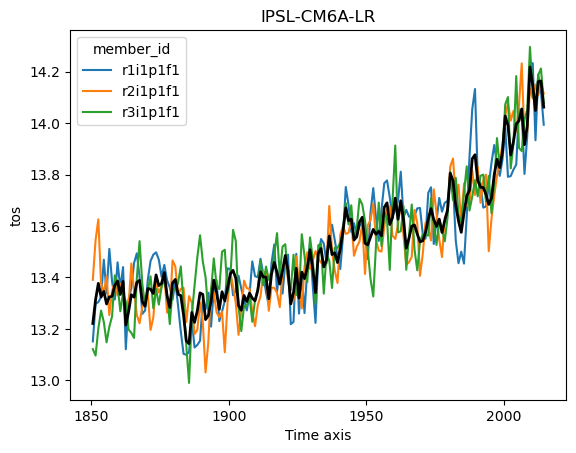

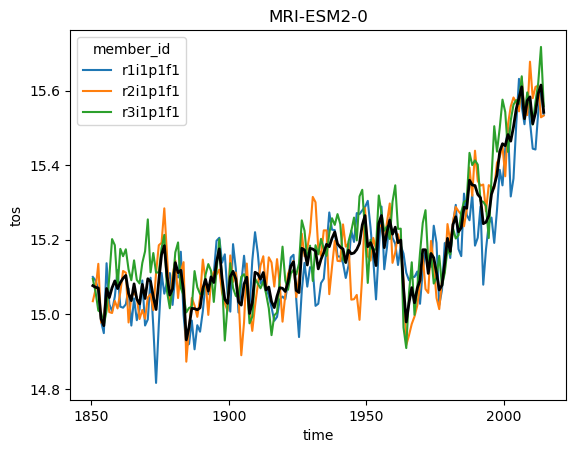

In [24]:
for name, ds in ddict.items():
    # construct yearly global mean timeseries
    mean_temp = ds.tos.mean(['x', 'y']).coarsen(time=12).mean()
    plt.figure()
    mean_temp.plot(hue='member_id')
    # lets also plot the average over all members
    mean_temp.mean('member_id').plot(color='k', linewidth=2)
    plt.title(ds.attrs['source_id']) #Extract the model name right from the dataset metadata
    plt.show()

The above result is roughly correct, but as discussed in earlier lectures we need to do proper area weighting to ensure that different parts of the globe are weighted properly. You can look at the [original notebook](https://earth-env-data-science.github.io/lectures/models/cmip.html) to see how to do things correctly. 

## Other ideas to explore: 
- ESMs are not always on simple or similar grids:
    - For intercomparison, the most common choice is to regrid everything to a common grid. There is a package called [xesmf](https://xesmf.readthedocs.io/en/latest/) for this. See [this example](https://earth-env-data-science.github.io/lectures/models/regridding.html).
    - Sometimes one needs to work with the native grid, and there is a package called [xgcm](https://xgcm.readthedocs.io/en/latest/index.html) for this. See [this example](https://earth-env-data-science.github.io/lectures/models/xgcm.html).
- Datasets can sometimes (often) get quite big, making it challenging even for the largest computers to handle their analysis. One solution to this is to use multiple computers in parallel. There are a few different Python frameworks to do this, where [dask](https://docs.dask.org/en/latest/) is probably the most adopted framework at this point. See [this example](https://earth-env-data-science.github.io/lectures/dask/intro.html). One advantage to dask is that [integrates natively with xarray](https://docs.xarray.dev/en/stable/user-guide/dask.html), and with some forethought much of the parallelization can take place automatically.